In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

df = pd.read_csv('Spotify_Youtube.csv')

# Basic info

In [2]:
# Features and basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [3]:
# Summary statistics for the dataset
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [4]:
df.shape

(20718, 28)

For this exploration, we only want to look at numerical columns:

In [5]:
# display Numerical and Categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical Columns: {len(numerical_columns)}")
print(numerical_columns)
print(f"Categorical Columns: {len(categorical_columns)}")
print(categorical_columns)
print(f"Total Columns: {len(df.columns)}")

Numerical Columns: 16
['Unnamed: 0', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
Categorical Columns: 12
['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Url_youtube', 'Title', 'Channel', 'Description', 'Licensed', 'official_video']
Total Columns: 28


# Sub-sampling

In [6]:
# Sub-samples for observation purpose
df_only_numerical = df[numerical_columns]
df_only_numerical.sample(n=10)

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
13790,13790,0.643,0.331,2.0,-9.235,0.0387,0.761,0.000000,0.3730,0.648,160.006,83422.0,66448.0,1936.0,48.0,105206780.0
18316,18316,0.698,0.895,0.0,-4.439,0.0628,0.172,0.000015,0.4090,0.838,114.914,229605.0,4852273.0,157304.0,29968.0,7259295.0
11879,11879,0.711,0.455,10.0,-7.261,0.0289,0.480,0.000000,0.1110,0.198,124.015,291467.0,595377372.0,1676193.0,63657.0,86686707.0
6667,6667,0.720,0.424,4.0,-17.830,0.0357,0.510,0.000026,0.0712,0.582,110.811,228160.0,8700106.0,75618.0,3035.0,17283126.0
8128,8128,0.765,0.766,0.0,-9.374,0.0348,0.410,0.052000,0.1770,0.923,128.177,222760.0,69658943.0,362887.0,13541.0,NaN
7966,7966,0.649,0.434,9.0,-6.669,0.0317,0.452,0.000000,0.0818,0.264,121.954,208608.0,4024308.0,50583.0,1072.0,7995394.0
11785,11785,0.794,0.674,1.0,-12.821,0.0524,0.123,0.000000,0.0951,0.726,117.050,261987.0,13173364.0,50879.0,2150.0,41088037.0
1728,1728,0.711,0.362,3.0,-10.851,0.0381,0.272,0.000000,0.1270,0.616,117.287,194293.0,280889.0,3418.0,115.0,299483954.0
5948,5948,0.485,0.621,2.0,-6.829,0.0389,0.476,0.000009,0.1890,0.528,78.665,218059.0,564831.0,3954.0,81.0,15696290.0
19381,19381,0.614,0.526,5.0,-7.492,0.0603,0.468,0.000000,0.0939,0.366,177.913,186552.0,4176205.0,72809.0,958.0,38943698.0


<Axes: >

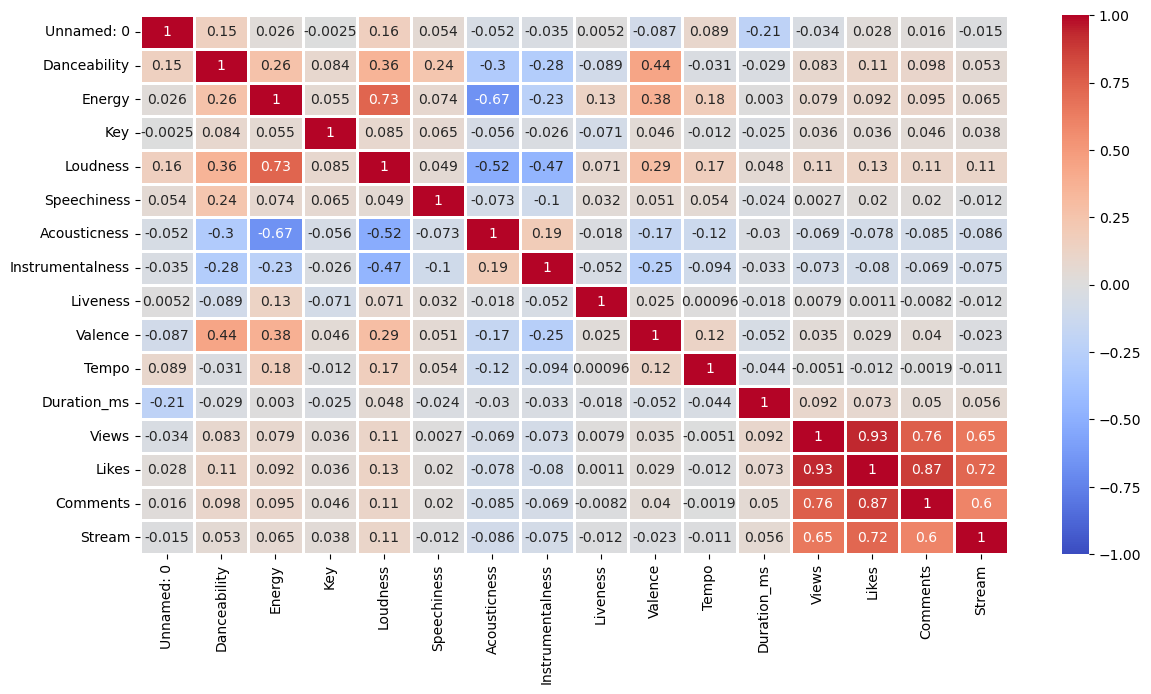

In [7]:
SAMPLE_SIZE = 1000
# Picking a random sample of observations so that it is less time consuming and compute intensive to create heatmap
df_only_numerical_subsample = df_only_numerical.sample(SAMPLE_SIZE)

# To set the size of the figure in which the correlation heatmap is displyed
plt.figure(figsize=(14, 7))
sns.heatmap(df_only_numerical_subsample.corr(method='pearson'), annot = True, linewidth=1, fmt='.2g',
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', annot_kws={"fontsize": 10})

# Heatmap

In [8]:
# display most frequent artists
n = 5
freq_artists = df['Artist'].value_counts()[:n].index.tolist()
freq_artists

['Gorillaz',
 'Die drei !!!',
 'Hollywood Undead',
 'Empire of the Sun',
 'White Noise for Babies']

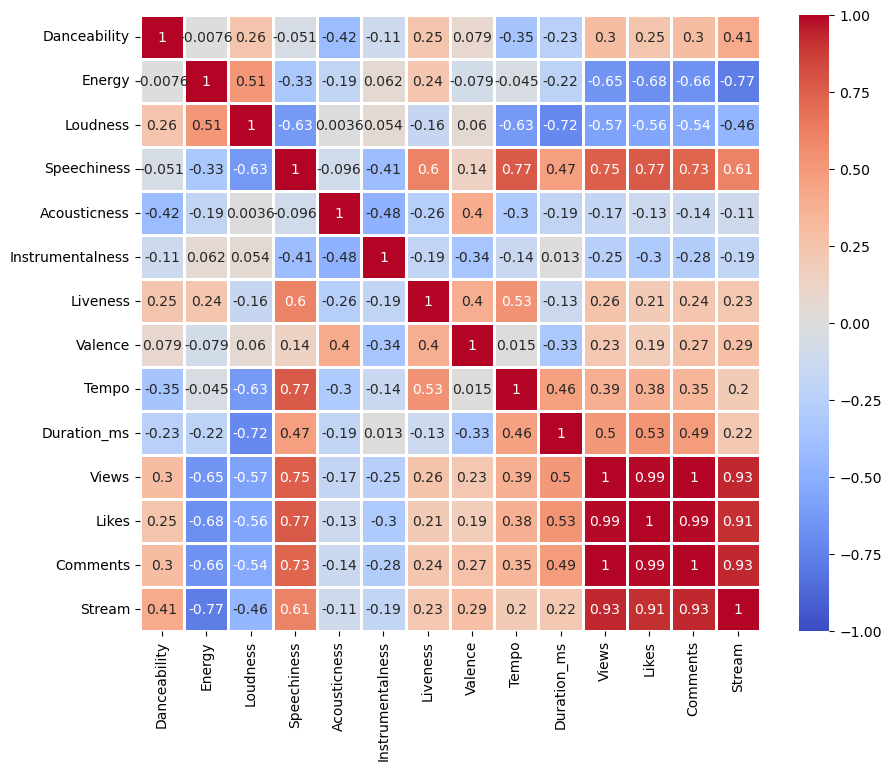

In [9]:
# looking for trends in songs of the SAME ARTIST

df_Gorillaz = df[df['Artist'] == 'Gorillaz']
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]
df_Gorillaz_num = df_Gorillaz[num_cols]
plt.figure(figsize=(10, 8))
sns.heatmap(df_Gorillaz_num.corr(), vmin=-1, vmax=1, center= 0, linewidth=2,
            fmt='.2g', cmap= 'coolwarm', annot=True)
plt.show()

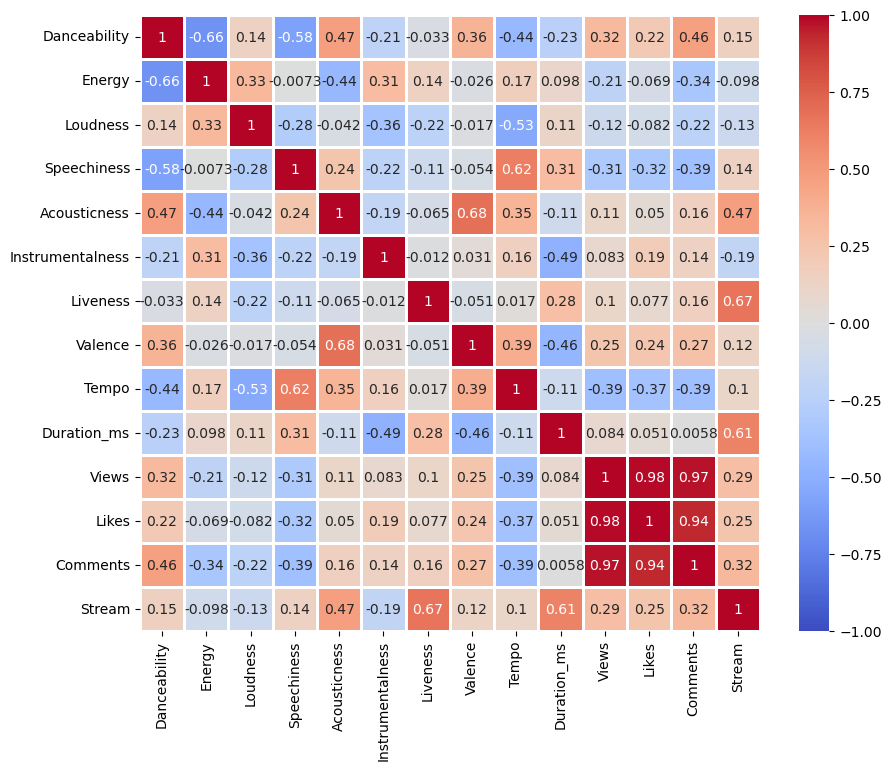

In [10]:
df_HU = df[df['Artist'] == 'Hollywood Undead']
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]
df_HU_num = df_HU[num_cols]
plt.figure(figsize=(10, 8))
sns.heatmap(df_HU_num.corr(), vmin=-1, vmax=1, center= 0, linewidth=2, fmt='.2g',
            cmap= 'coolwarm', annot=True)
plt.show()

# Pairplot

c:\Users\Bryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


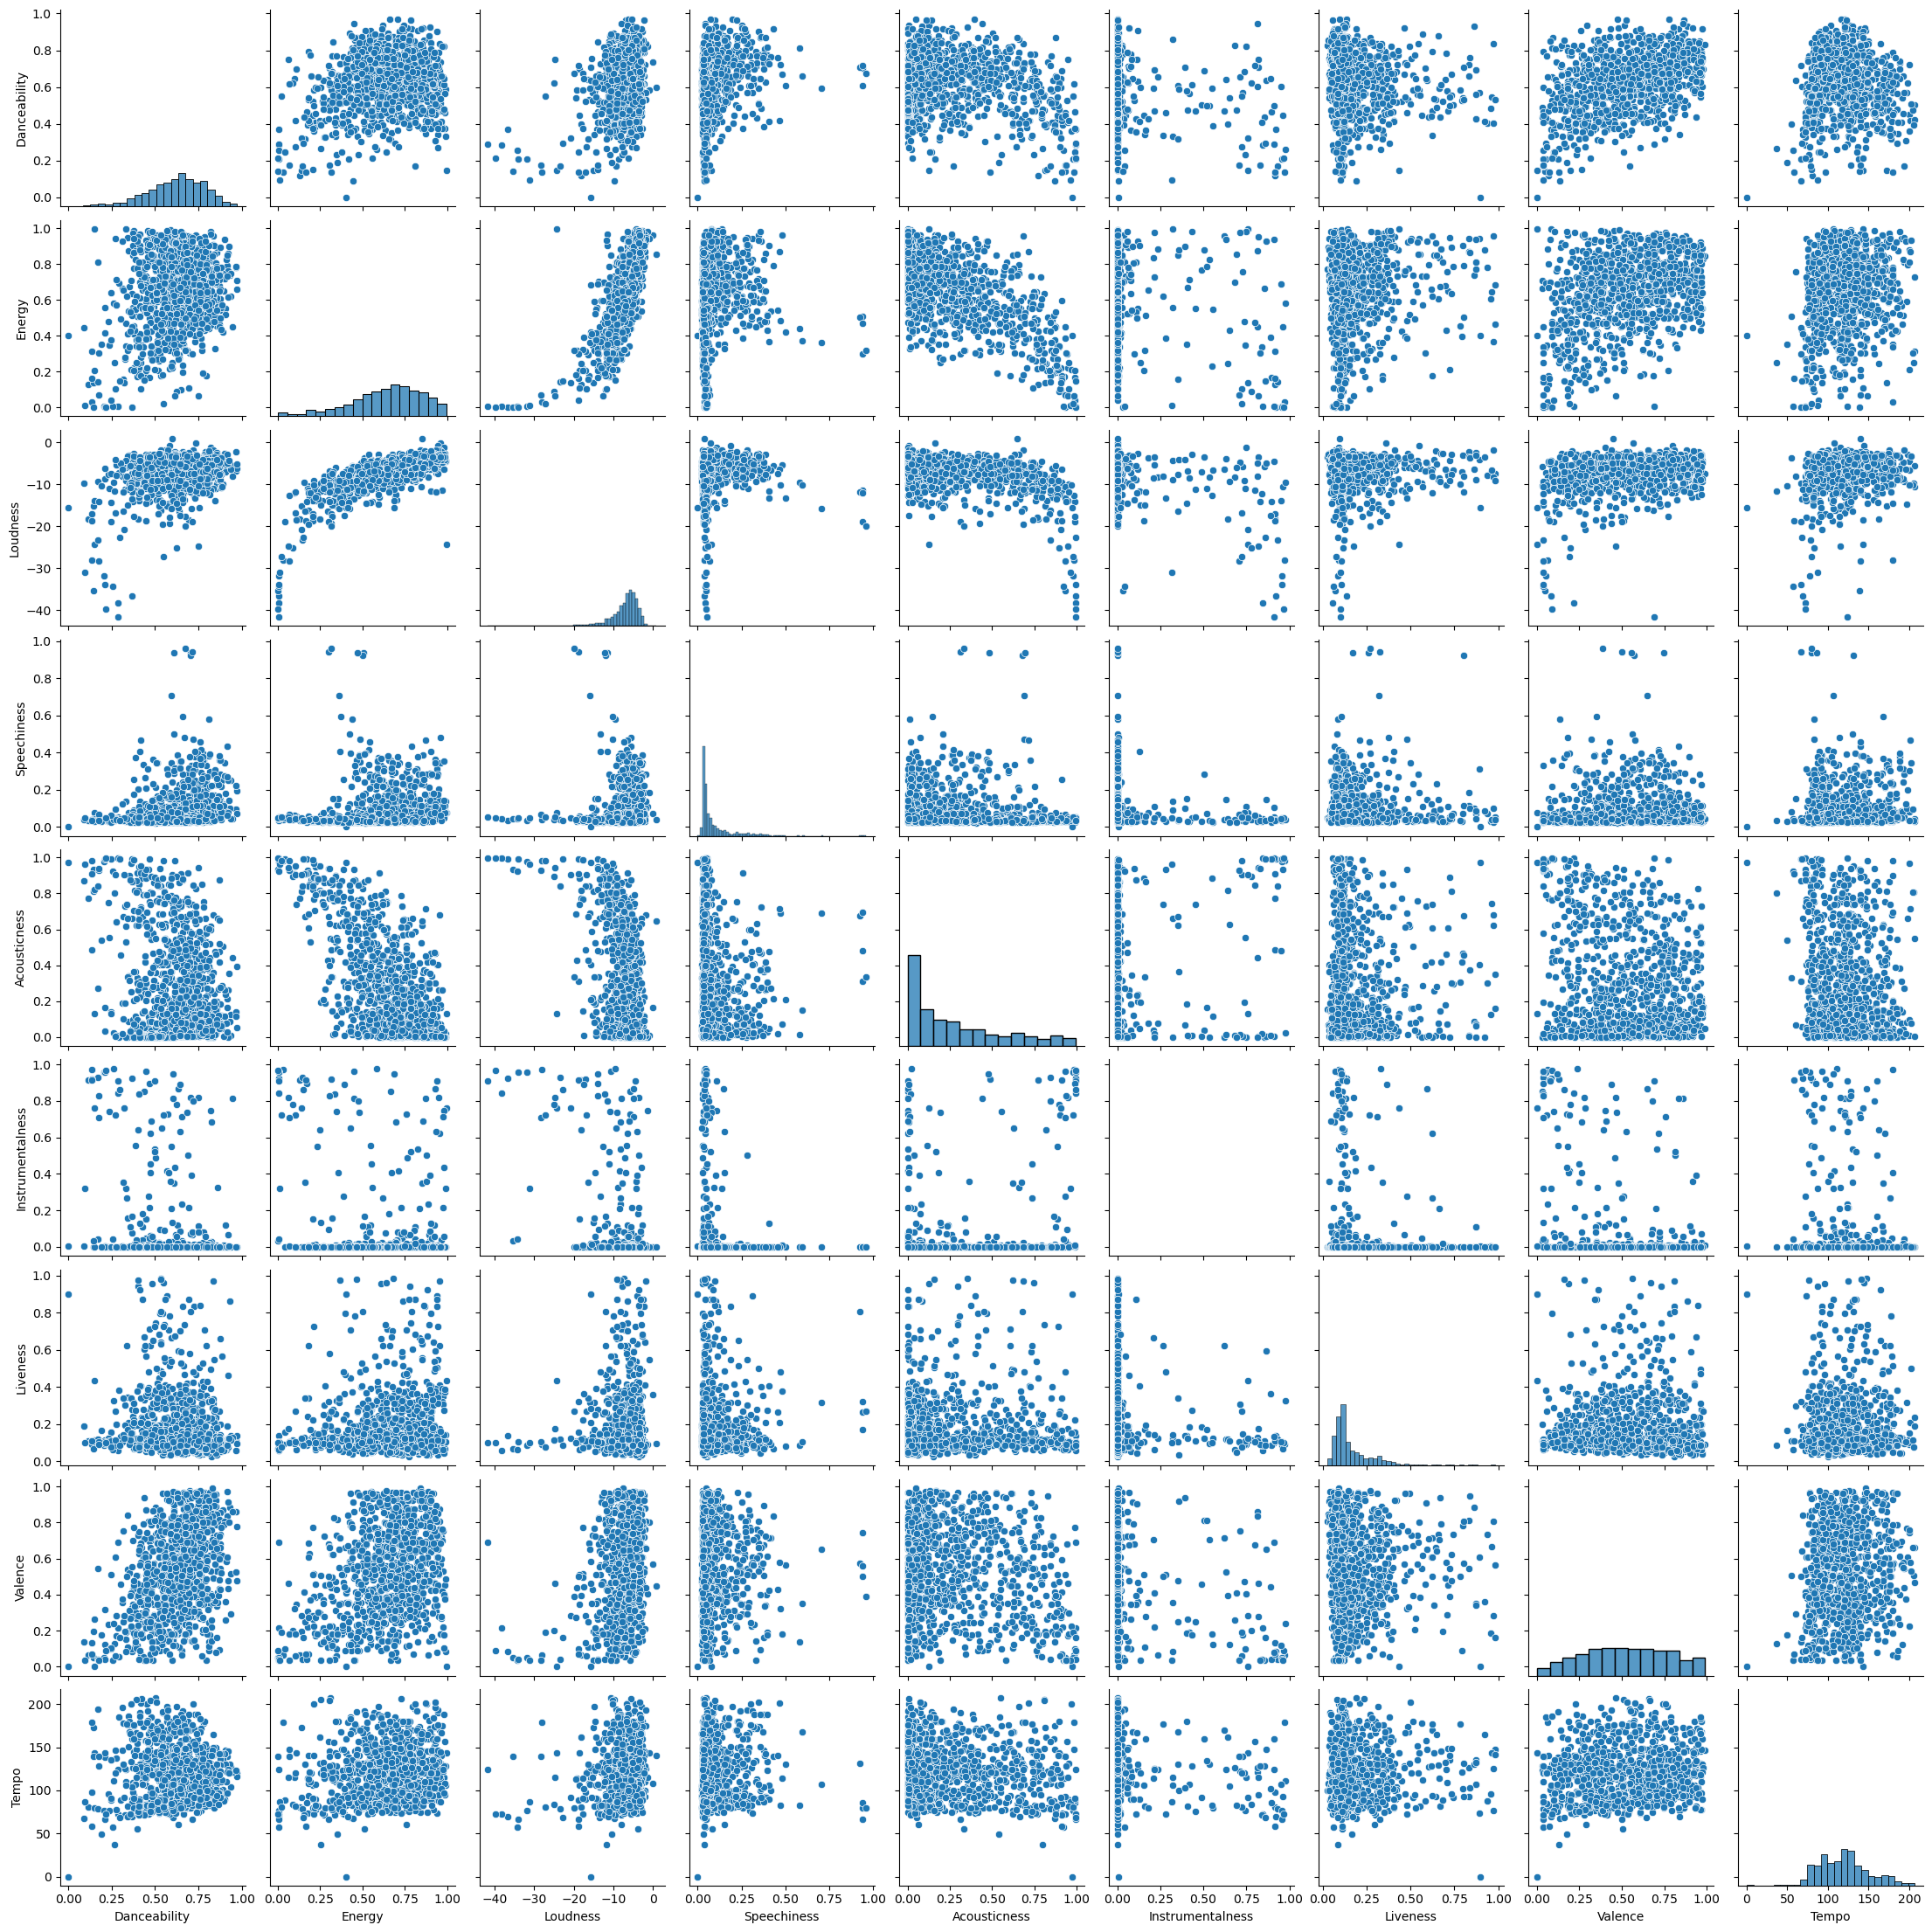

In [11]:
#generate pairplots for relavent numerical vairable
df_important = df_only_numerical_subsample[["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]]
sns.pairplot(df_important)
plt.show()

# Histogram

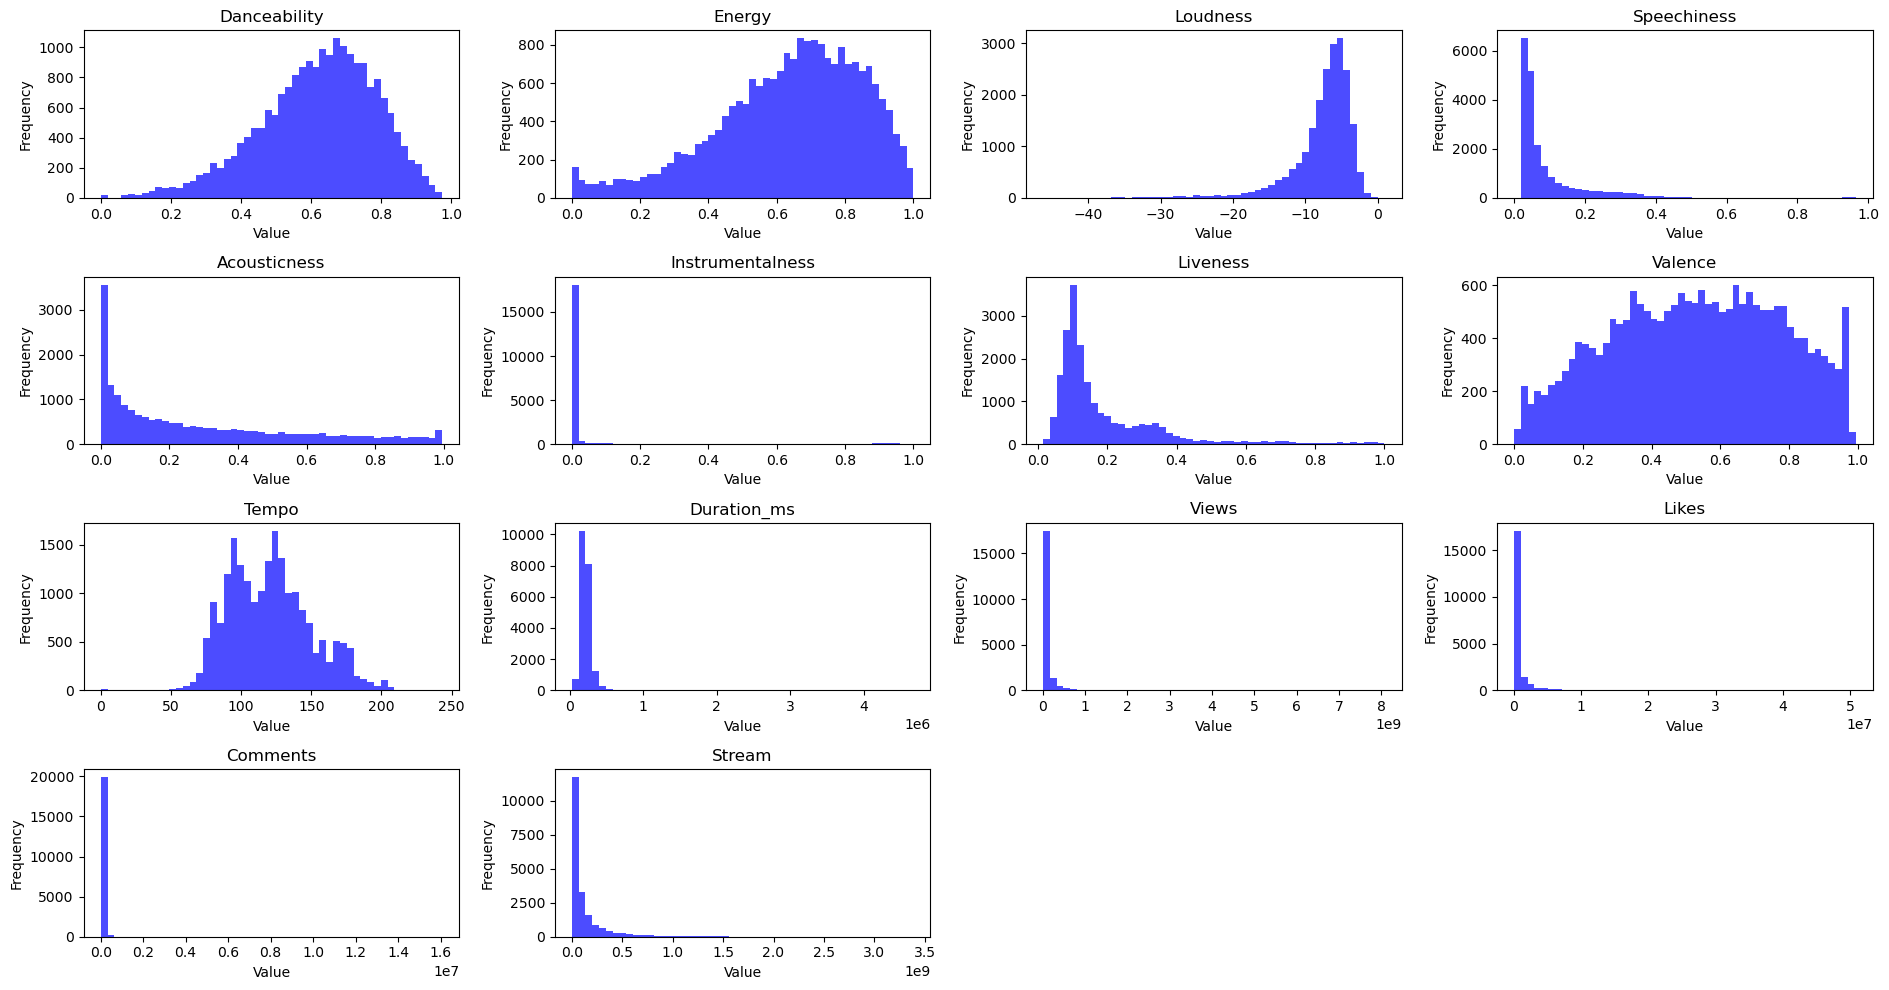

In [12]:
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]

# Calculate the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns in the subplot grid
n_rows = len(num_cols) // n_cols + (1 if len(num_cols) % n_cols > 0 else 0)  # Calculate rows, add an extra row if needed

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(19, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for idx, column in enumerate(num_cols):
    axs[idx].hist(df[column], bins=50, color='blue', alpha=0.7)
    axs[idx].set_title(column)
    axs[idx].set_ylabel('Frequency')
    axs[idx].set_xlabel('Value')

# Hide any empty subplots
for ax in axs[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


As we can see from the above graphs, some data categories like views, likes, comments, and streams are highly skewed. Therefore, we need to scale them logarithmicly to normalize them:

# Histogram with logarithmic transformation

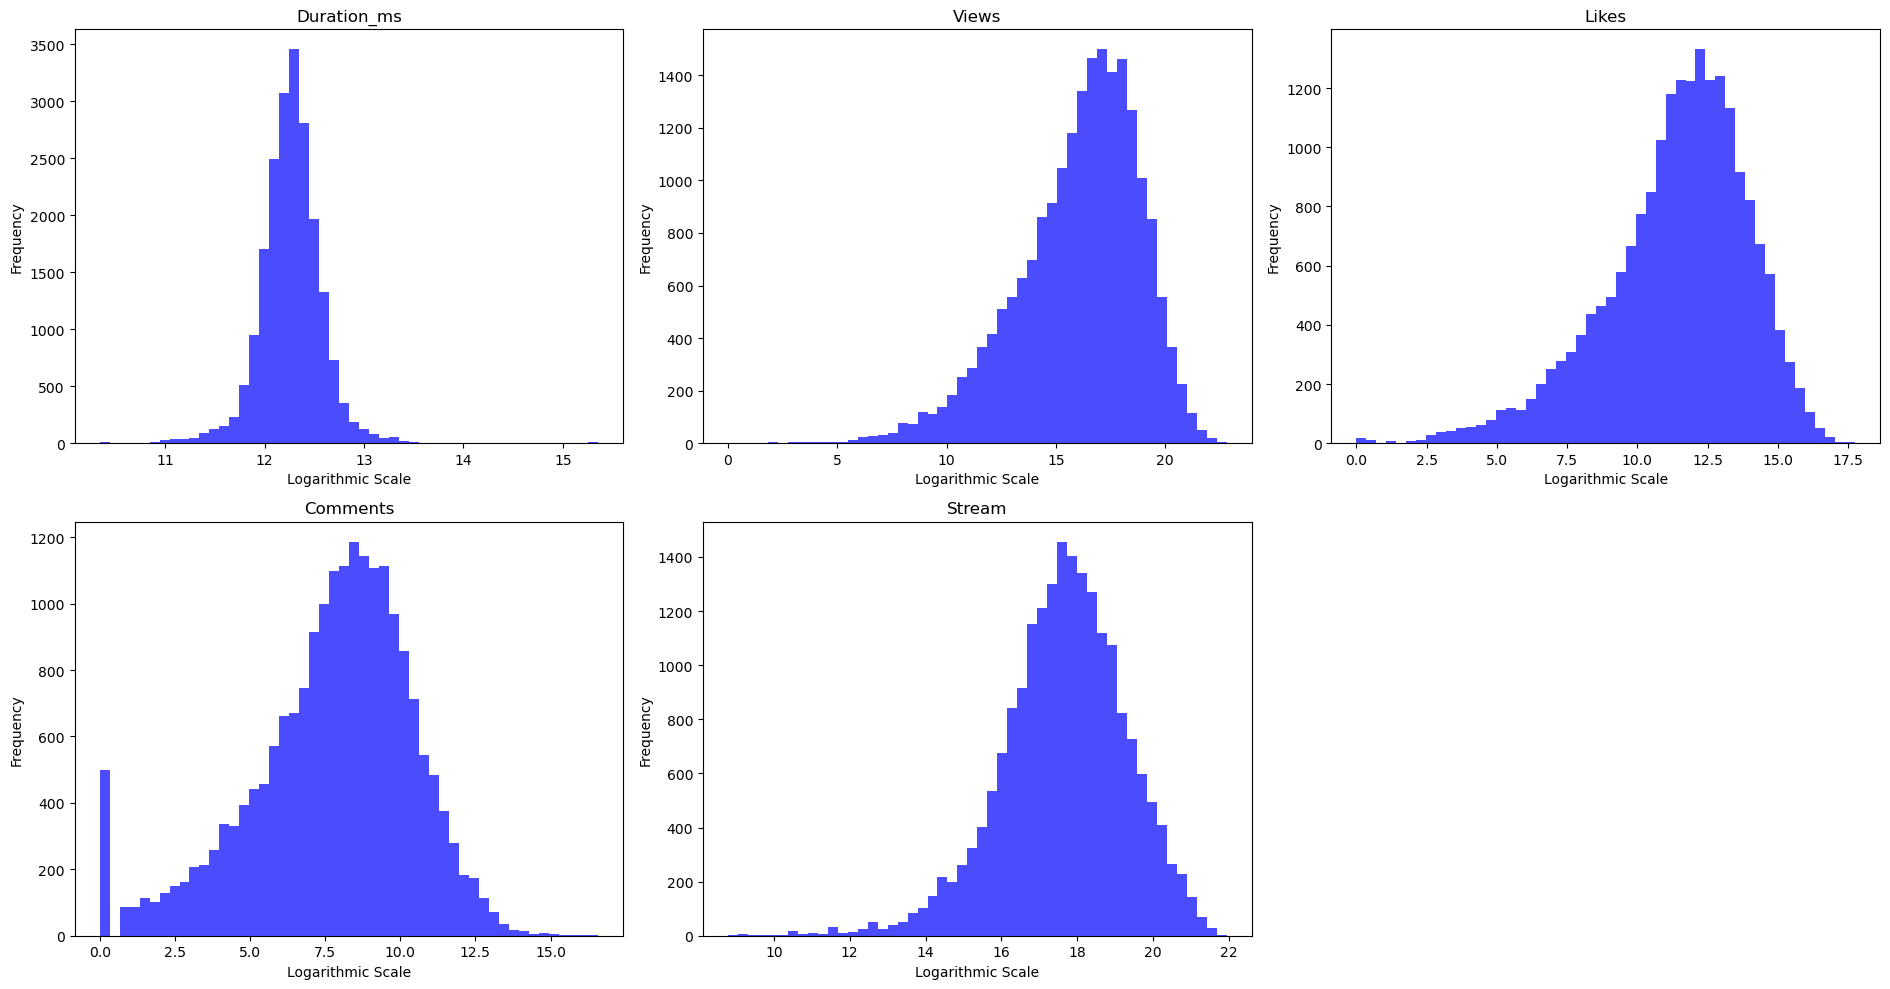

In [13]:
logarithmic_categories = ["Duration_ms", "Views", "Likes", "Comments", "Stream"]

# Calculate the number of rows and columns for the subplot grid
n_cols = 3
n_rows = len(logarithmic_categories) // n_cols + (1 if len(logarithmic_categories) % n_cols > 0 else 0)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(19, 10))
axs = axs.flatten()

for idx, column in enumerate(logarithmic_categories):
    # Apply a logarithmic transformation with a small shift to handle zero values
    logarithmic_data = np.log(df[column] + 1)
    axs[idx].hist(logarithmic_data, bins=50, color='blue', alpha=0.7)
    axs[idx].set_title(column)
    axs[idx].set_xlabel('Logarithmic Scale')
    axs[idx].set_ylabel('Frequency')

# Hide any empty subplots
for ax in axs[len(logarithmic_categories):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# Pie charts

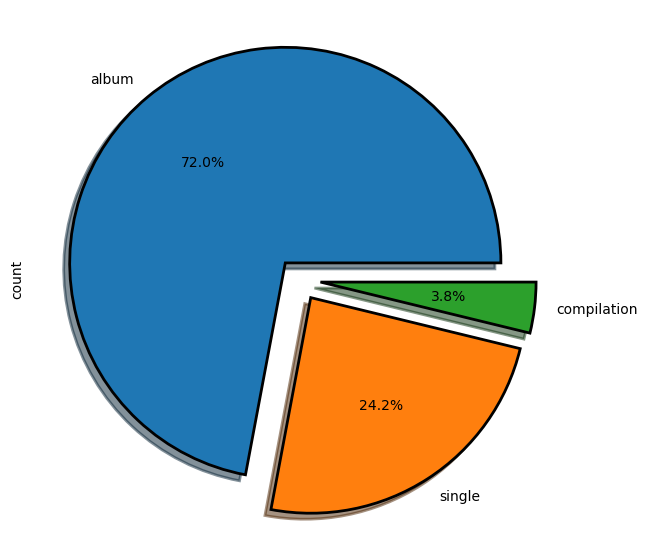

In [14]:
df_only_categorical = df[categorical_columns]
df_only_categorical['Album_type'].value_counts()

fig = plt.figure(figsize=(10, 7))
df_only_categorical['Album_type'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,explode=(0.1,0.1,0.1),wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

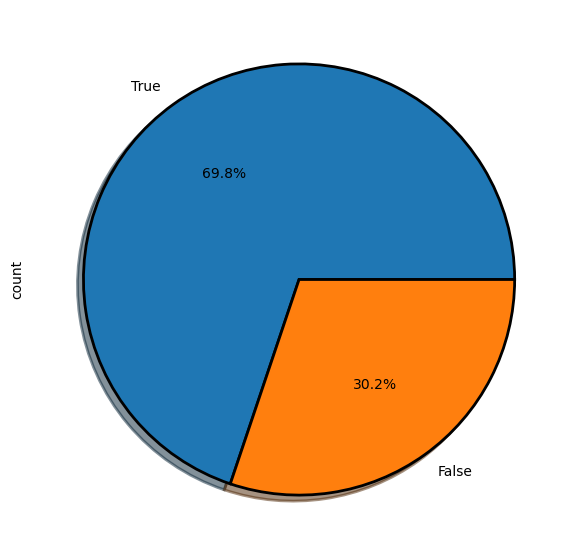

In [15]:
fig = plt.figure(figsize=(10, 7))
df_only_categorical['Licensed'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

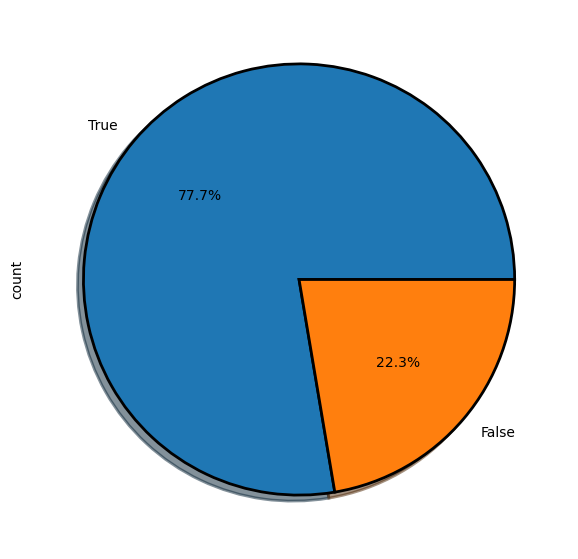

In [16]:
fig = plt.figure(figsize=(10, 7))
df_only_categorical['official_video'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

#Dropping Irrelevant Features

We would want to drop some features from our dataset that are not relevant for hte purposes of traning the model. They will however be used in later stages of this project.

These are columns that hold values which are unique to each of the records in our dataset. Some of these include the song's title, url, description, etc.

In the end after the model is trained and when we provide song recommendations to users after performing clustering, this information would be used.

In [17]:
def drop_irrelevant_cols(df, irrelevant_columns):

    input_num_cols = df.shape[1]
    print(f"The original dataset has {input_num_cols} columns", end = "\n\n")

    df = df.drop(columns=irrelevant_columns)
    print(f"{len(irrelevant_columns)} columns were successfully dropped from the dataframe!")
    print(irrelevant_columns, end = "\n\n")

    output_num_cols = df.shape[1]
    print(f"The final dataset has {output_num_cols} columns", end = "\n\n")

    return df

In [18]:
irrelevant_columns = ['Url_youtube', 'Url_spotify', 'Uri', 'Unnamed: 0', 'Channel', 'Licensed', 'official_video']
df = drop_irrelevant_cols(df, irrelevant_columns)
df.head()

The original dataset has 28 columns

7 columns were successfully dropped from the dataframe!
['Url_youtube', 'Url_spotify', 'Uri', 'Unnamed: 0', 'Channel', 'Licensed', 'official_video']

The final dataset has 21 columns



,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Title,Views,Likes,Comments,Description,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.6130,0.772,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.0463,0.852,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.1160,0.551,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.0640,0.578,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.0698,0.525,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,6.172597e+08


#Data Imputation

There are some records in the dataset that have null values. Since this only applies to less than 3 percent of the data, we will be dropping it.

In [19]:
def drop_null_values(df):

    initial_num_rows = df.shape[0]
    print(f"Number of rows in the dataframe before dropping nulls: {initial_num_rows}", end = "\n\n")

    df.dropna(inplace=True)
    print(f"Null values were dropped from the dataframe!", end = "\n\n")

    output_num_rows = df.shape[0]
    print(f"Number of rows in the dataframe after dropping nulls: {output_num_rows}", end = "\n\n")

    return df

In [20]:
df = drop_null_values(df)
df.head()

Number of rows in the dataframe before dropping nulls: 20718

Null values were dropped from the dataframe!

Number of rows in the dataframe after dropping nulls: 19170



,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Title,Views,Likes,Comments,Description,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.6130,0.772,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.0463,0.852,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.1160,0.551,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.0640,0.578,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.0698,0.525,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,6.172597e+08


#Data Encoding (One Hot)

In [21]:
def oneHotEncodeFeatures(df, feature_list):

    print("Features we are encoding:")
    print(feature_list, end = "\n\n")
    encoder = OneHotEncoder()

    print(f"Number of columns before one hot encoding {df.shape[1]}", end = "\n\n")

    encoded_df = pd.DataFrame(encoder.fit_transform(df[feature_list]).toarray())
    print("One hot encoding completed!", end = "\n\n")

    df.drop(columns=feature_list)

    df = df.join(encoded_df)

    print(f"Number of columns before one hot encoding {df.shape[1]}", end = "\n\n")

    return df

In [22]:
df = oneHotEncodeFeatures(df, ['Key',  'Album_type'])
df

Features we are encoding:
['Key', 'Album_type']

Number of columns before one hot encoding 21

One hot encoding completed!

Number of columns before one hot encoding 36



,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,5,6,7,8,9,10,11,12,13,14
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,0.448000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,0.028000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,0.024300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,0.356000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Encoding (Frequency (popularity) Encoding)

In [23]:
#Let's try frequency based encoding!


def prep_view_based_encoding_artist(df):
    # Calculate the total views for each artist
    artist_views = df.groupby('Artist')['Views'].sum().reset_index()
    artist_views.columns = ['Artist', 'TotalViews']

    # Sort artists by total views (highest first)
    artist_views = artist_views.sort_values('TotalViews', ascending=False).reset_index(drop=True)

    # Create a mapping from artist names to a numeric label based on total views
    artist_to_numeric = {artist: i for i, artist in enumerate(artist_views['Artist'])}

    # Map the artist names in the original dataframe to their numeric labels based on views
    df['Artist_encoded'] = df['Artist'].map(artist_to_numeric)
    df['Artist_encoded'] = df['Artist_encoded'].fillna(-1).astype(int)

    return df


def prep_view_based_encoding_album(df):
    # Calculate the total views for each artist
    album_views = df.groupby('Album')['Views'].sum().reset_index()
    album_views.columns = ['Album', 'TotalViews']

    # Sort artists by total views (highest first)
    album_views = album_views.sort_values('TotalViews', ascending=False).reset_index(drop=True)

    # Create a mapping from artist names to a numeric label based on total views
    album_to_numeric = {album: i for i, album in enumerate(album_views['Album'])}

    # Map the artist names in the original dataframe to their numeric labels based on views
    df['Album_encoded'] = df['Album'].map(album_to_numeric)
    df['Album_encoded'] = df['Album_encoded'].fillna(-1).astype(int)

    return df



In [24]:
prep_view_based_encoding_artist(df)
df

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,6,7,8,9,10,11,12,13,14,Artist_encoded
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,224
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,224
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,224
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,224
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,0.448000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,0.028000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,0.024300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,0.356000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025


In [25]:
print(df)

            Artist                                          Track  \
0         Gorillaz                                 Feel Good Inc.   
1         Gorillaz                                Rhinestone Eyes   
2         Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3         Gorillaz                             On Melancholy Hill   
4         Gorillaz                                 Clint Eastwood   
...            ...                                            ...   
20713  SICK LEGEND                           JUST DANCE HARDSTYLE   
20714  SICK LEGEND                 SET FIRE TO THE RAIN HARDSTYLE   
20715  SICK LEGEND                      OUTSIDE HARDSTYLE SPED UP   
20716  SICK LEGEND                            ONLY GIRL HARDSTYLE   
20717  SICK LEGEND                             MISS YOU HARDSTYLE   

                                               Album Album_type  Danceability  \
0                                         Demon Days      album         0.818   
1        

# First Model

### Subsetting the data - using some continous columns

In [26]:
df_cols = ['Danceability', 'Energy', "Loudness", "Speechiness", "Acousticness"]
df_with_song = df
df = df[df_cols]

In [27]:
df

,Danceability,Energy,Loudness,Speechiness,Acousticness
0,0.818,0.705,-6.679,0.1770,0.008360
1,0.676,0.703,-5.815,0.0302,0.086900
2,0.695,0.923,-3.930,0.0522,0.042500
3,0.689,0.739,-5.810,0.0260,0.000015
4,0.663,0.694,-8.627,0.1710,0.025300
...,...,...,...,...,...
20713,0.582,0.926,-6.344,0.0328,0.448000
20714,0.531,0.936,-1.786,0.1370,0.028000
20715,0.443,0.830,-4.679,0.0647,0.024300
20716,0.417,0.767,-4.004,0.4190,0.356000


-----------

### Applying sklearn MinMax Scaler

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=df_cols)

In [29]:
print(df.describe())

       Danceability        Energy      Loudness   Speechiness  Acousticness
count  19170.000000  19170.000000  19170.000000  19170.000000  19170.000000
mean       0.637106      0.636143      0.819056      0.098489      0.288972
std        0.169777      0.213444      0.097891      0.108849      0.286778
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.533333      0.509990      0.795107      0.037033      0.043774
50%        0.655385      0.666993      0.842615      0.052490      0.188754
75%        0.761026      0.797996      0.876227      0.107884      0.470883
max        1.000000      1.000000      1.000000      1.000000      1.000000


In [30]:
df_with_song[df_cols] = df[df_cols]

In [31]:
df_with_song.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,6,7,8,9,10,11,12,13,14,Artist_encoded
count,17722.000000,17722.000000,19170.000000,17722.000000,17722.000000,17722.000000,19170.000000,19170.000000,19170.000000,19170.000000,...,17722.000000,17722.000000,17722.000000,17722.000000,17722.000000,17722.000000,17722.000000,17722.000000,17722.000000,19170.000000
mean,0.637952,0.635908,5.292645,0.819350,0.098870,0.288742,0.055476,0.191322,0.528267,120.607345,...,0.070026,0.108340,0.071719,0.096490,0.068954,0.080014,0.719106,0.036283,0.244611,996.890819
std,0.169838,0.212989,3.579947,0.097123,0.109157,0.286680,0.192768,0.165217,0.244996,29.588308,...,0.255198,0.310818,0.258029,0.295271,0.253383,0.271322,0.449448,0.186998,0.429869,584.092222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.533333,0.510240,2.000000,0.795531,0.037137,0.044376,0.000000,0.094100,0.338000,96.997500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,489.000000
50%,0.656410,0.666993,5.000000,0.842658,0.052905,0.188754,0.000002,0.125000,0.535000,119.969000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,990.000000
75%,0.762051,0.796996,8.000000,0.876253,0.108921,0.470883,0.000436,0.234000,0.724000,139.946000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1496.750000
max,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993000,243.372000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2039.000000


### Trying to determine n_clusters using silhouette_score

In [32]:
Xtrain_k, X_test_k = train_test_split(df, test_size=0.2, random_state=42)

While performing analysis using the silhouette_score, we want to determine the ideal number of clusters. The following should be kept in mind while doing so: \\
1. Silhouette analysis can be used to study the separation distance between the resulting clusters. As we increase the number of clusters, the clusters tend to be located closer to one another it is expected for the silhouette_score to show a decreasing trend.
2. We have a bad pick if we have clusters with below average silhouette scores
3. We do not one of the clusters to have significantly more samples than the other clusters.


For n_clusters = 5 The average silhouette_score is : 0.23412432339959569
For n_clusters = 10 The average silhouette_score is : 0.2219543219551074
For n_clusters = 15 The average silhouette_score is : 0.21013060074444495
For n_clusters = 20 The average silhouette_score is : 0.2000035928177054
For n_clusters = 25 The average silhouette_score is : 0.20376022324787754


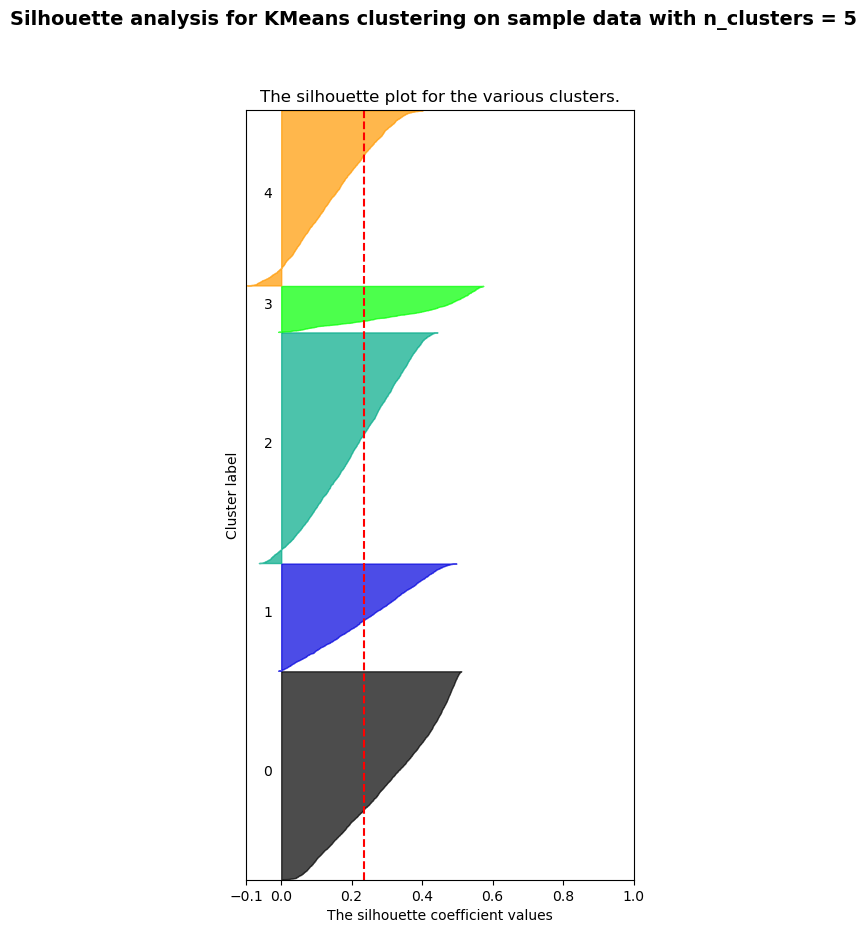

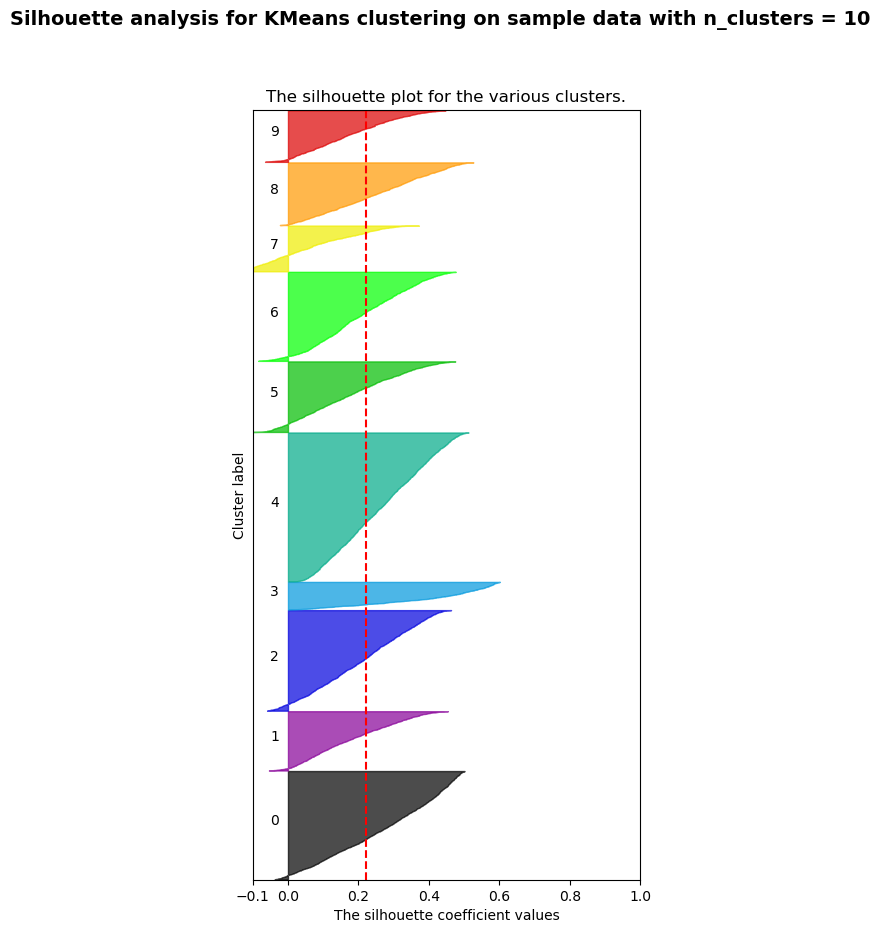

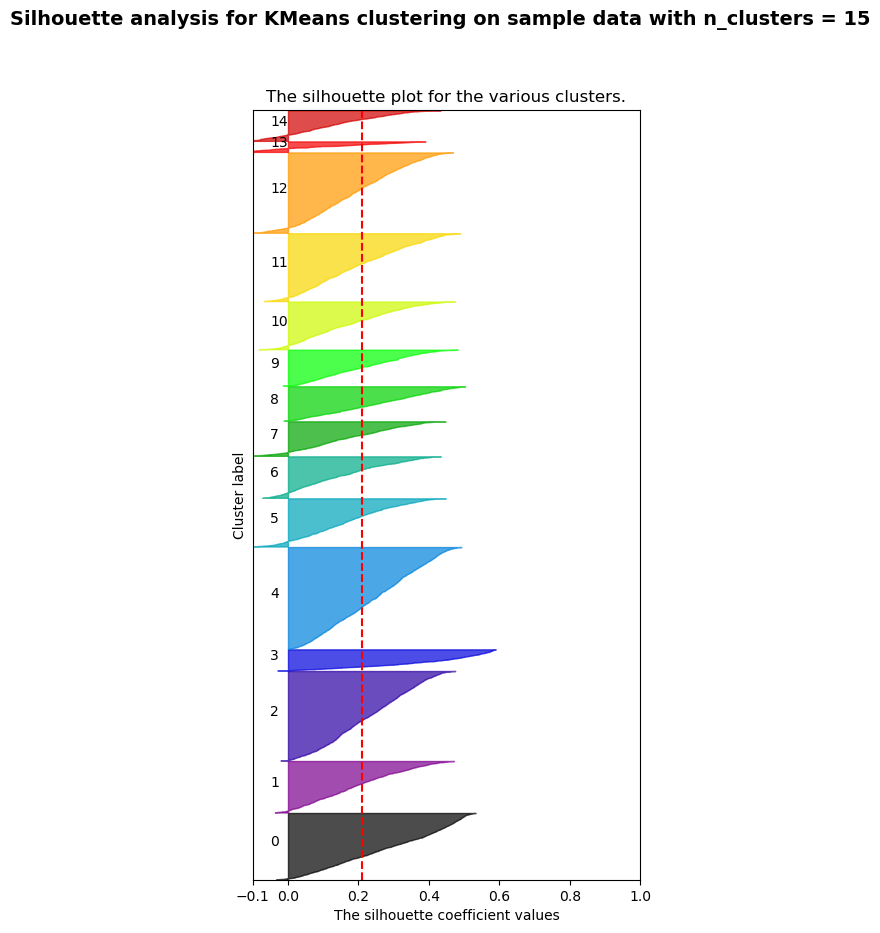

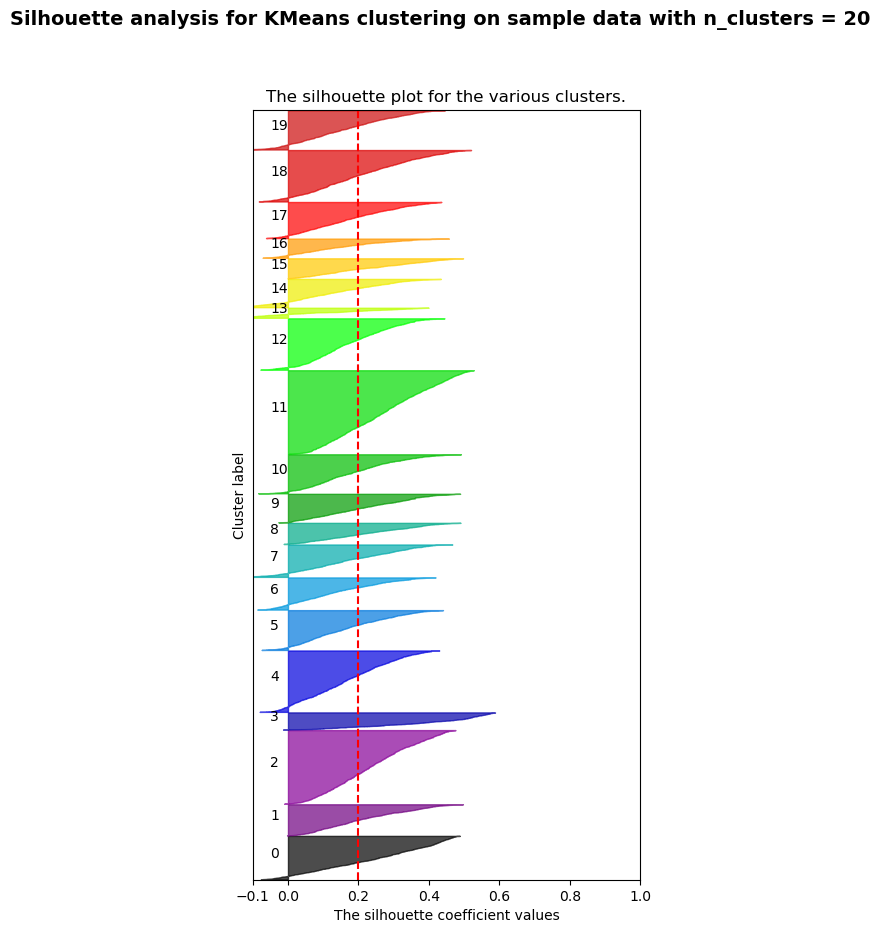

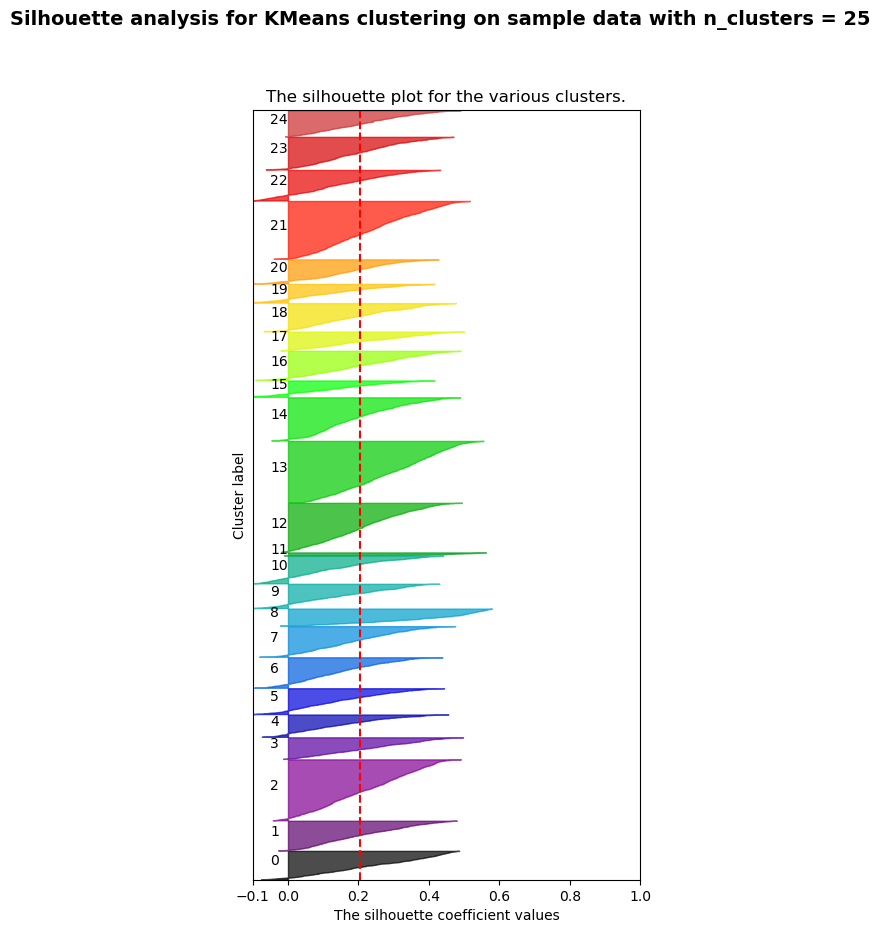

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range(5, 30, 5):
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(5, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xtrain_k) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init='auto' ,random_state=10)
    cluster_labels = clusterer.fit_predict(Xtrain_k)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xtrain_k, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xtrain_k, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

We see that with less than 20 clusters, there are classes that are disproportionately larger than some of the other ones. We should be fine picking n_clusters = 20 or greater since the records are distributed among clusters better and the silhouette coefficient for each of them is greater than the average indicated by the red dotted line.

### Performing clustering with n_clusters = 20

In [34]:
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(Xtrain_k)

In [35]:
Xtrain_with_clusters = Xtrain_k
Xtrain_with_clusters['cluster'] = kmeans.labels_

In [36]:
Xtrain_with_clusters

,Danceability,Energy,Loudness,Speechiness,Acousticness,cluster
15303,0.833846,0.559991,0.855335,0.064108,0.108433,2
13967,0.529231,0.404988,0.719171,0.043983,0.152609,12
10301,0.637949,0.932999,0.911026,0.039938,0.000406,13
11901,0.836923,0.725994,0.895741,0.133817,0.099397,10
4202,0.558974,0.701994,0.722245,0.056224,0.087850,1
...,...,...,...,...,...,...
11284,0.356923,0.724994,0.834347,0.084336,0.000867,1
11964,0.735385,0.657993,0.876132,0.031432,0.547188,4
5390,0.661538,0.449989,0.841046,0.034544,0.092469,12
860,0.078872,0.084581,0.429374,0.046680,0.925703,3


### Mapping songs to clusters -- `Artist` and `Track`




In [37]:
df_with_song

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,6,7,8,9,10,11,12,13,14,Artist_encoded
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.838974,0.704994,6.0,0.838905,0.183610,0.008392,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,224
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.693333,0.702994,8.0,0.857222,0.031328,0.087248,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,224
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.712821,0.922998,1.0,0.897183,0.054149,0.042670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,224
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.706667,0.738995,2.0,0.857328,0.026971,0.000014,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,224
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.680000,0.693994,10.0,0.797609,0.177386,0.025401,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,NaN,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025


In [38]:
# Analyzing the cluster labels
# We create a map data structure to map a cluster number to the songs in that cluster

print("The following are the labels associated with each cluster:")
print(kmeans.labels_)
print("Length: " , len(kmeans.labels_))

map = {}
for i in range(len(kmeans.labels_)):
    label = kmeans.labels_[i]

    artist = df_with_song.iloc[i]['Artist']
    track = df_with_song.iloc[i]['Track']

    if label not in map:
        map[label] = [(artist, track),]

    else:
        map[label].append((artist, track))

The following are the labels associated with each cluster:
[ 2 12 13 ... 12  3  5]
Length:  15336


### Getting user preferences


In [39]:
def get_user_preferences():
    user_input = []
    print("Please enter your music preferences on a scale of 0 to 1")
    for col in df_cols:
        try:
            rating = float(input(f"{col} score: "))
            assert 0 <= rating <= 1, "\nASSERT FAILED: Score must be between 0 and 1"
            user_input.append (rating)
        except AssertionError as e:
            print(e)
            break
        except ValueError:
            print("\nEXCEPTION ENCOUNTERED: Input must be a number.")
            break
    return np.array(user_input)

user_preferences = get_user_preferences()

Please enter your music preferences on a scale of 0 to 1



### Obtaining the cluster corresponding to user preferences

In [40]:
user_preferences = user_preferences.reshape(1, 5)
user_preferences_df = pd.DataFrame(user_preferences, columns=df_cols)
user_preferences_df

,Danceability,Energy,Loudness,Speechiness,Acousticness
0,0.1,0.2,0.3,0.1,0.6


In [41]:
cluster = kmeans.predict(user_preferences_df)[0]
print("Cluster the user's preferences fit into:", cluster)

Cluster the user's preferences fit into: 3


### Obtaining a random sample of songs corresponding to the cluster associated with the user

In [42]:
import random

NUM_SONSGS_TO_SUGGEST = 5

songs_rec = random.sample(map[cluster], NUM_SONSGS_TO_SUGGEST)

In [43]:
print("Here are songs you may like...")

songs_rec_df = pd.DataFrame(songs_rec, columns=['Artist', 'Title'])

Here are songs you may like...


In [44]:
songs_rec_df

,Artist,Title
0,Armand Van Helden,Wings
1,Leo Dan,Te He Prometido
2,Los Ángeles Azules,Nunca Es Suficiente
3,Banda Pequeños Musical,Por Mis Defectos
4,Charli XCX,Used To Know Me


In [45]:
# Get the information from the database about one of the songs that were recommended.
getArtist = songs_rec_df.iloc[0]['Artist']
getTrack = songs_rec_df.iloc[0]['Title']

In [46]:
df_with_song[(df_with_song['Artist'] == getArtist) & (df_with_song['Track'] == getTrack)]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,6,7,8,9,10,11,12,13,14,Artist_encoded
7229,Armand Van Helden,Wings,Extra Dimensional,album,0.482051,0.636993,6.0,0.803905,0.193983,0.170682,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1950


**Note:** We will try to improve the accuracy of the predictions here for our upcoming model using approaches like K Nearest Neighbors instead of using uniform sampling within a cluster

## Training and Test Accuracy of our First Model

Now we'll find the training error using Within-Cluster Sum of Square metrics. Note that we divide by the length of the training set to account for the fact that WCSS takes a simple sum, and the training/test set will be disproportionately sized.

In [47]:
# Inertia of the kmeans model refers to sum of squared distances of samples to
# their closest cluster center.
kmeans.inertia_ / len(Xtrain_k)

0.0266235369454978

Now we'll find the testing error.

In [48]:
train_cluster_labels = kmeans.predict(X_test_k)

wcss_train = 0
for i in range (n_clusters):
  center = kmeans.cluster_centers_[i]
  train_labels = X_test_k[train_cluster_labels == i]
  wcss_train += np.sum((train_labels - center)**2)

wcss_test = np.sum(wcss_train)

wcss_test / len(X_test_k)

0.027158164733017565

We find that our training error and testing error, as measured by WCSS, are very similar.  This suggests that our model is neither overfitting nor underfitting, as either of these situations should suggest a larger discrepancy between our errors.  Thus, on the fitting graph, we are in a well-situated spot.

# Second Model

For our second model, we decided to use a DBSCANS Clustering Algorithm.  Whereas our implementation with K-Means in our first model required us to suggest the number of clusters, we tried DBSCANS, which evaluates the structure of the clustering, to determine an optiminal number of clusters.  

In [49]:
from sklearn.cluster import DBSCAN

Xtrain, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [50]:
Xtrain

,Danceability,Energy,Loudness,Speechiness,Acousticness
15303,0.833846,0.559991,0.855335,0.064108,0.108433
13967,0.529231,0.404988,0.719171,0.043983,0.152609
10301,0.637949,0.932999,0.911026,0.039938,0.000406
11901,0.836923,0.725994,0.895741,0.133817,0.099397
4202,0.558974,0.701994,0.722245,0.056224,0.087850
...,...,...,...,...,...
11284,0.356923,0.724994,0.834347,0.084336,0.000867
11964,0.735385,0.657993,0.876132,0.031432,0.547188
5390,0.661538,0.449989,0.841046,0.034544,0.092469
860,0.078872,0.084581,0.429374,0.046680,0.925703


According to [this journal](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf), a way to choose the ideal epsilon value for a DBSCANS model is to observe the "elbow", or the point of curvature.  We use the knowledge to guide our hyperparameter search.

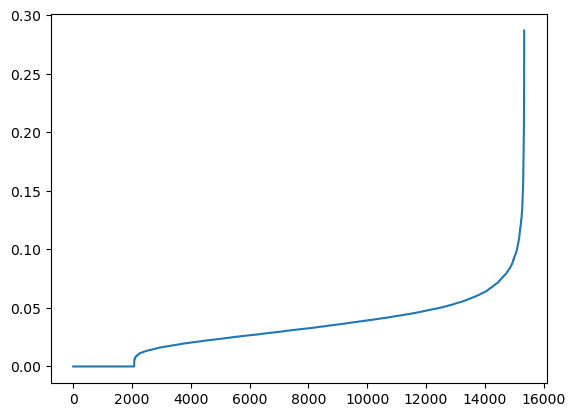

In [51]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(Xtrain)
distances, indices = neighbors_fit.kneighbors(Xtrain)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

We observe that the "elbow" is found approximately towards the 0.05 to 0.1 range; we may now use this to guide our hyperparameter search for epsilon.

In [52]:
# We will iteratively tune for various values of min_samples and eps, tracking the values combination that provides the best model
# The metric we shall use is the silhouette_score to determine how closely related each cluster is.

best_eps = 0
best_min_samples = 0

best_score = 0


EPS_START = 0.05
EPS_END = 0.1
EPS_STEP = 0.01
MIN_SAMPLES_START = 6
MIN_SAMPLES_END = 12
SAMPLE_STEP = 1

# Convert epsilon values to a list to iterate through
EPS_VALUES = []
k = EPS_START
while k <= EPS_END:
    EPS_VALUES.append(k)
    k += EPS_STEP

Here we define a method to iteratively create models based on epsilon values between some range, and min_samples between some range, effectively a simple GridSearch.  We track the parameters that produce the clusters with the greatest silhouette score as our metric, suggesting the best fit clusters.

In [53]:
from sklearn.metrics import silhouette_score

# Iteratively search through hyperparameters epsilon and min samples
for i in range(MIN_SAMPLES_START, MIN_SAMPLES_END + 1, SAMPLE_STEP):
    for j in EPS_VALUES:
        clustering = DBSCAN(eps=j, min_samples=i).fit(Xtrain)
        Xtrain['cluster'] = clustering.labels_
        Xtrain['cluster'].value_counts()

        # Evaluate the clusters via silhouette score
        score = silhouette_score(Xtrain.drop(columns=['cluster']), Xtrain['cluster'])
        print("Silhouette Score for eps = " + str(j) + ", min_samples = " + str(i) + ": " + str(score))

        # If these hyperparameters produce a better score than we last checked for, save it!
        if abs(score) > best_score:
            best_score = abs(score)

            # Save hyperparameters
            best_eps = j
            best_min_samples = i

            print("New optimal hyperparameters found!")

Silhouette Score for eps = 0.05, min_samples = 6: -0.5622648874412403
New optimal hyperparameters found!
Silhouette Score for eps = 0.060000000000000005, min_samples = 6: -0.5161690098938643
Silhouette Score for eps = 0.07, min_samples = 6: -0.4577458401851597
Silhouette Score for eps = 0.08, min_samples = 6: -0.4239514651923254
Silhouette Score for eps = 0.09, min_samples = 6: -0.39545553781330567
Silhouette Score for eps = 0.09999999999999999, min_samples = 6: -0.3720122076760875
Silhouette Score for eps = 0.05, min_samples = 7: -0.4942000279618997
Silhouette Score for eps = 0.060000000000000005, min_samples = 7: -0.47927851683747785
Silhouette Score for eps = 0.07, min_samples = 7: -0.4326527075597975
Silhouette Score for eps = 0.08, min_samples = 7: -0.3985536112557387
Silhouette Score for eps = 0.09, min_samples = 7: -0.3682293026779361
Silhouette Score for eps = 0.09999999999999999, min_samples = 7: -0.34753742328433973
Silhouette Score for eps = 0.05, min_samples = 8: -0.4988243

In [54]:
print("Optimal Parameters Found -> eps = " + str(best_eps) + ", min_samples = " + str(best_min_samples) + " -> Score: " + str(best_score))

Optimal Parameters Found -> eps = 0.05, min_samples = 6 -> Score: 0.5622648874412403


We create a model based on the optimal parameters to evaluate.

In [55]:
# fit returns a fitted instance of self
model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clustering = model.fit(Xtrain)

In [56]:
# we will now assign the clusters corresponding to the best set of hyperparameters found
Xtrain['cluster'] = clustering.labels_

We now observe the unique clusters and their corresponding labels that the model created.  Given the large dataset and large variety of music being used, we get the expected result of a considerable number of clusters.

In [57]:
# Unique for each point in the dataset given to fit()
# Noisy samples are given the label -1.
Xtrain['cluster'].unique()

array([  0,  -1, 156,   1,   2,   3,  72,   4,   5,   6,   7, 109,   8,
        21, 127,  67, 137,   9,  13,  10,  11,  12, 128, 160,  44, 124,
        14,  15, 126, 102,  35, 110, 159,  16,  52,  17,  18,  19,  20,
        32,  22,  23,  26,  78,  24, 136,  38,  25,  64,  83, 149,  27,
        55,  28,  29, 154,  30, 123,  77,  33,  31,  41,  61,  65,  34,
        89,  84,  36,  37,  69, 108,  70,  39,  40,  85,  42,  43,  49,
       100, 114,  45,  46,  47,  71, 151,  94,  48, 135, 129,  92, 162,
        50,  51,  53,  54,  75, 155, 161,  82,  91,  56,  57,  58, 106,
        79,  59,  60,  63, 116,  62, 139,  87,  73, 113,  66, 153, 138,
        68,  88, 131, 150, 157,  74, 140, 121,  81, 147,  93,  76, 148,
       146, 152,  80, 112, 117,  99,  97, 141,  95, 132,  86,  90, 103,
       115, 119,  98,  96, 133, 101, 143, 120, 134, 107, 104, 105, 158,
       142, 111, 144, 118, 145, 122, 125, 130], dtype=int64)

Now that we have our clusters defined, we will define a predict function to apply to the testing set to predict which cluster a song in the test set most closely aligns to.

In [58]:
import numpy as np
import scipy as sp

"""
Source: for the function dbscan_predict
https://stackoverflow.com/questions/27822752/scikit-learn-predicting-new-points-with-dbscan
"""
def dbscan_predict(dbscan_model, X_new, metric=sp.spatial.distance.cosine):
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1
    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        core_sample_features = dbscan_model.components_[:5]
        core_sample_cluster = dbscan_model.components_[-1]

        for i, x_core in enumerate(dbscan_model.components_):
            x_core = x_core[:-1]
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break

    return y_new

# convert the dataframe to a numpy array to get predictions on the the test
yhat_test = dbscan_predict(model, X_test.to_numpy())

In [59]:
np.unique(yhat_test)

array([ -1,   0,   1,   2,   3,   4,   5,  10,  11,  14,  15,  19,  30,
        34,  57,  75,  94, 158])

In [60]:
X_test['cluster'] = yhat_test

In [61]:
Xtrain

,Danceability,Energy,Loudness,Speechiness,Acousticness,cluster
15303,0.833846,0.559991,0.855335,0.064108,0.108433,0
13967,0.529231,0.404988,0.719171,0.043983,0.152609,-1
10301,0.637949,0.932999,0.911026,0.039938,0.000406,0
11901,0.836923,0.725994,0.895741,0.133817,0.099397,0
4202,0.558974,0.701994,0.722245,0.056224,0.087850,-1
...,...,...,...,...,...,...
11284,0.356923,0.724994,0.834347,0.084336,0.000867,-1
11964,0.735385,0.657993,0.876132,0.031432,0.547188,1
5390,0.661538,0.449989,0.841046,0.034544,0.092469,-1
860,0.078872,0.084581,0.429374,0.046680,0.925703,-1


In [62]:
X_test

,Danceability,Energy,Loudness,Speechiness,Acousticness,cluster
18113,0.746667,0.583992,0.826694,0.182573,0.052609,0
8882,0.826667,0.928999,0.916538,0.125519,0.264055,0
344,0.668718,0.748995,0.869242,0.091909,0.085140,0
11532,0.416410,0.335987,0.725870,0.035788,0.818273,3
16303,0.950769,0.562991,0.856967,0.181535,0.030722,0
...,...,...,...,...,...,...
16497,0.659487,0.713994,0.863815,0.050415,0.004457,0
14579,0.877949,0.708994,0.822942,0.230290,0.350401,0
2351,0.910769,0.583992,0.698374,0.116183,0.038654,0
19092,0.537436,0.642993,0.852134,0.030809,0.452811,1


## Testing On User Input

Based on the clusters and labels created, we will now create a database where each label is associated with songs that belong to that cluster via its label.

In [63]:
print("The following are the labels associated with each cluster:")
print(clustering.labels_)
print("Length: " , len(clustering.labels_))

map_db = {}
for i in range(len(clustering.labels_)):
    label = clustering.labels_[i]

    artist = df_with_song.iloc[i]['Artist']
    track = df_with_song.iloc[i]['Track']


    if label in map_db:
        map_db[label].append((artist, track))
    else:
        map_db[label] = [(artist, track)]

len(map_db)

The following are the labels associated with each cluster:
[ 0 -1  0 ... -1 -1 -1]
Length:  15336


164

In [64]:
# Recall the definition of the function used to take user input in the First Model; using the same user input, we shall compare a prediction made with our second model.
user_preferences_df

,Danceability,Energy,Loudness,Speechiness,Acousticness
0,0.1,0.2,0.3,0.1,0.6


We now predict using our model to find which cluster most closely represents user preferences.

In [65]:
cluster = dbscan_predict(model, user_preferences_df.to_numpy())[0]
print("Cluster the user's preferences fit into:", cluster)

NUM_SONGS_TO_SUGGEST = 5

if NUM_SONSGS_TO_SUGGEST > len(map_db[cluster]):
    NUM_SONGS_TO_SUGGEST = len(map_db[cluster])

songs_rec = random.sample(map_db[cluster], NUM_SONGS_TO_SUGGEST)

print("Here are songs you may like...")

songs_rec_df = pd.DataFrame(songs_rec, columns=['Artist', 'Title'])

songs_rec_df

Cluster the user's preferences fit into: 10
Here are songs you may like...


,Artist,Title
0,Shaggy,It Wasn't Me
1,Mos Def,Sunshine
2,Shweta Mohan,"Enna Solla (From ""Thangamagan"") - The New Life..."
3,Fall Out Boy,My Songs Know What You Did In The Dark (Light ...
4,Nas,Nas Is Like


In [66]:
# Get the information from the database about one of the songs that were recommended.
getArtist = songs_rec_df.iloc[0]['Artist']
getTrack = songs_rec_df.iloc[0]['Title']
df_with_song[(df_with_song['Artist'] == getArtist) & (df_with_song['Track'] == getTrack)]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,6,7,8,9,10,11,12,13,14,Artist_encoded
1687,Shaggy,It Wasn't Me,Hot Shot,album,0.509744,0.489990,0.0,0.828687,0.028631,0.673694,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,367
1695,Shaggy,It Wasn't Me,It Wasn't Me,single,0.854359,0.618992,11.0,0.861885,0.055809,0.111445,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,367


Thus we have our predictions!

## Training and Test Accuracy of out Second Model

Now we'll find the training error using Within-Cluster Sum of Square metrics. Note that we divide by the length of the training set to account for the fact that WCSS takes a simple sum, and the training/test set will be disproportionately sized.

In [67]:
# finding the cluster centers corresponding to the cluster labels
clusters = Xtrain.groupby("cluster").mean()
clusters

,Danceability,Energy,Loudness,Speechiness,Acousticness
cluster,,,,,
-1,0.633326,0.572980,0.795199,0.136255,0.382148
0,0.657799,0.770113,0.864711,0.056697,0.080130
1,0.710505,0.556588,0.841350,0.041277,0.553153
2,0.711433,0.702484,0.863132,0.256102,0.021379
3,0.553013,0.446551,0.809107,0.036100,0.781501
...,...,...,...,...,...
158,0.754530,0.734161,0.843131,0.305152,0.213520
159,0.634872,0.171817,0.695964,0.041961,0.894746
160,0.636154,0.638993,0.849945,0.129668,0.069602


In [68]:
# we remove the first row since -1 corresponds to noise
clusters = clusters.iloc[1:]
clusters

,Danceability,Energy,Loudness,Speechiness,Acousticness
cluster,,,,,
0,0.657799,0.770113,0.864711,0.056697,0.080130
1,0.710505,0.556588,0.841350,0.041277,0.553153
2,0.711433,0.702484,0.863132,0.256102,0.021379
3,0.553013,0.446551,0.809107,0.036100,0.781501
4,0.567994,0.288456,0.759017,0.037772,0.847493
...,...,...,...,...,...
158,0.754530,0.734161,0.843131,0.305152,0.213520
159,0.634872,0.171817,0.695964,0.041961,0.894746
160,0.636154,0.638993,0.849945,0.129668,0.069602


In [69]:
# convert cluster centers to numpy array
cluster_centers = clusters.to_numpy()

In [70]:
def get_wcss_score_data(cluster_centers, model, data):

    wcss_score = 0
    for i in range (len(cluster_centers)):
        cluster_center = cluster_centers[i]
        points = data[data['cluster'] == i]

        # remove cluster column to only keep features
        points = points.iloc[:, :-1]

        wcss_score += np.sum((cluster_center - points)**2)

    return np.round(sum(wcss_score) / len(data), 2)

In [71]:
print("WCSS equivalent for train data:", get_wcss_score_data(cluster_centers, model, Xtrain))
print("WCSS equivalent for test data:", get_wcss_score_data(cluster_centers, model, X_test))

WCSS equivalent for train data: 0.01
WCSS equivalent for test data: 0.09


We notice that we find the WCSS for the training data, approx. 0.01, is considerably lower than our WCSS for our WCSS for our testing data.  This suggests that we are actually leaning towards overfitting on the fitting graph, as we are performing better on the data we train on than we do on the data we test on.  This is a pretty significant loss in performance in comparison to our first model built on K-Means, both in regards to cluster strength (as measured by the WCSS) and in regards to a fit model, as this second model with DBSCANS is noticeably more over-fit than our K-Means model.


It is of note that the WCSS for both training and test data are quite low.  In comparison to our K-Means model, with which was performed with 20 clusters, we find that the DBSCANS model seemingly optimized at over 150 clusters.  This is likely a contributing to the loss of generality of our model, as clusters are far more detailed for the training data.  One factor for this may be the choice of epsilon as a sort of "tolerance factor," which was derived by looking at the elbow graph based on the training data.

# Third Model

Moving on to our third model, we will incorporate the results we derived from our first two models.  To recap, our first model generated clusters using the unsupervised algorithm K-Means, providing it parameters to generate 20 clusters, which helps us generate labels and assign them to observations in the dataset.  In our second model, we generated clusters using the unsupervised algorithm DBSCANS, which algorithmically determined how many clusters to generate, and once again used it to generate labels based on the clusters and assign them to observations in the dataset.

Using Within Clusters Sum-of-Squares as a metric to evaluate the accuracy of our models, we find that KMeans tends to provide a considerably more desirable accuracy, and has a much more balanced fit as opposed to DBSCANS, which had a lower general accuracy and tended to overfit.  As such, we decided to move forward with our first model, K-Means, to build our last model based on K-Nearest Neighbors.

The original dataset, comprised of a variety of Spotify and YouTube observations, has no labels for genre.  Our plan is, using the clusters and generated labels that we generated using K-Means, to perform the supervised learning method of K-Nearest Neighbors to predict labels on some testing subsample of our data.  Based on these results, we can then evaluate accuracy based on our generated labels.  From this model, we can derive our final results for musical genre classification and recommendation based on specific musical parameters.

We first observe the clusters generated by kmeans.

In [72]:
kmeans.cluster_centers_

array([[0.66605329, 0.39135361, 0.76626167, 0.06683709, 0.78196515],
       [0.49193259, 0.66249576, 0.83697817, 0.05229733, 0.06772151],
       [0.74704699, 0.62379236, 0.83222212, 0.06635268, 0.06141991],
       [0.25367467, 0.05905942, 0.40113848, 0.04616896, 0.95174874],
       [0.73689463, 0.77082038, 0.86399216, 0.08256568, 0.49521929],
       [0.72353922, 0.62872399, 0.83169493, 0.35482033, 0.43074946],
       [0.48999534, 0.61462574, 0.82736833, 0.05848214, 0.36372412],
       [0.41559701, 0.89520244, 0.87524865, 0.0927725 , 0.02801958],
       [0.8611237 , 0.55483422, 0.81998703, 0.28176583, 0.0963388 ],
       [0.78306615, 0.61471697, 0.83408917, 0.08405061, 0.28633889],
       [0.82171857, 0.80395173, 0.87561251, 0.10135346, 0.07752111],
       [0.3972948 , 0.38130888, 0.76267464, 0.04246813, 0.64506754],
       [0.57813434, 0.42695319, 0.75306251, 0.0530661 , 0.16113782],
       [0.6325028 , 0.85899406, 0.87639091, 0.06145115, 0.03467885],
       [0.55600235, 0.66524717, 0.

### Defining a custom KNN function to predict


We now define a custom KNN function, where we train our KNN based on the labelled clusters from our K-Means model, to perform predictions and determine labels on test data based on the training from our training data.

In [73]:
from sklearn.neighbors import KNeighborsClassifier

def knn_predict(k, clustered_data, clusters, data_to_be_classified):
    """

        Parameters:
            1) k: number of neighbors
            2) clustered_data: data for which clusters are known
            3) clusters: clusters associated with each row of clustered_data
            4) data_to_be_classified: data for which we need to obtain the clusters
    """
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(clustered_data, clusters)
    yhat = neigh.predict(data_to_be_classified)
    return yhat


### Obtaining the cluster corresponding to user preferences

Using the same user preferences we obtained in Model 1, let use our new K nearest neighbors model to return a prediction.

In [74]:
user_preferences_df

,Danceability,Energy,Loudness,Speechiness,Acousticness
0,0.1,0.2,0.3,0.1,0.6


In [75]:
# USE KNN
cluster = knn_predict(k = 5, clustered_data = Xtrain_k.drop(columns=['cluster']), clusters = Xtrain_k['cluster'], data_to_be_classified = user_preferences_df)[0]
print("Cluster the user's preferences fit into:", cluster)

Cluster the user's preferences fit into: 3


Once again, using WCSS, we use this metric to evaluate the accuracy of this K Nearest neighbors model.

In [76]:
# Testing data evaluation of WCSS
test_cluster_labels = knn_predict(k = 5, clustered_data = Xtrain_k.drop(columns=['cluster']), clusters = Xtrain_k['cluster'], data_to_be_classified = X_test_k)

wcss_test = 0
for i in range (n_clusters):
  center = kmeans.cluster_centers_[i]
  test_labels = X_test_k[test_cluster_labels == i]
  wcss_test += np.sum((test_labels - center)**2)

wcss_test = np.sum(wcss_test)

print("Test WCSS: " +  str(wcss_test / len(X_test_k)))

# Training data evaluation of WCSS
train_cluster_labels = knn_predict(k = 5, clustered_data = Xtrain_k.drop(columns=['cluster']), clusters = Xtrain_k['cluster'], data_to_be_classified = Xtrain_k.drop(columns=['cluster']))

wcss_train = 0
for i in range (n_clusters):
    center = kmeans.cluster_centers_[i]
    train_labels = Xtrain_k[train_cluster_labels == i].drop(columns=['cluster'])
    wcss_train += np.sum((train_labels - center)**2)

wcss_train = np.sum(wcss_train)

print("Train WCSS: " +  str(wcss_train / len(Xtrain_k)))

Test WCSS: 0.027671409588589584
Train WCSS: 0.026870390582010423


In [77]:
from sklearn.metrics import accuracy_score

In [81]:
# We will iterate through different values of k for KNN can affect the WCSS.
history_test = []
history_train = []

for k_val in range(1, 100, 10):
  # Testing data evaluation of WCSS
  test_cluster_labels = knn_predict(k = k_val, clustered_data = Xtrain_k.drop(columns=['cluster']), clusters = Xtrain_k['cluster'], data_to_be_classified = X_test_k)

  wcss_test = 0
  for i in range (n_clusters):
    center = kmeans.cluster_centers_[i]
    test_labels = X_test_k[test_cluster_labels == i]
    wcss_test += np.sum((test_labels - center)**2)

  wcss_test = np.sum(wcss_test)

  print("Test WCSS for k = " + str(k_val) + ": " +  str(wcss_test / len(X_test_k)))
  history_test.append(wcss_test/len(X_test_k))

  # Training data evaluation of WCSS
  train_cluster_labels = knn_predict(k = k_val, clustered_data = Xtrain_k.drop(columns=['cluster']), clusters = Xtrain_k['cluster'], data_to_be_classified = Xtrain_k.drop(columns=['cluster']))

  wcss_train = 0
  for i in range (n_clusters):
      center = kmeans.cluster_centers_[i]
      train_labels = Xtrain_k[train_cluster_labels == i].drop(columns=['cluster'])
      wcss_train += np.sum((train_labels - center)**2)

  wcss_train = np.sum(wcss_train)
  history_train.append(wcss_train/len(Xtrain_k))

  print("Train WCSS for k = " + str(k_val) + ": " + str(wcss_train / len(Xtrain_k)))

Test WCSS for k = 1: 0.027832419974640563
Train WCSS for k = 1: 0.02662353694549779
Test WCSS for k = 11: 0.027564819011277643
Train WCSS for k = 11: 0.02685316856916713
Test WCSS for k = 21: 0.02746977773205704
Train WCSS for k = 21: 0.026839252776916206
Test WCSS for k = 31: 0.027436785697705805
Train WCSS for k = 31: 0.02682594049757853
Test WCSS for k = 41: 0.02743012849161164
Train WCSS for k = 41: 0.026833048134916496
Test WCSS for k = 51: 0.027409544407794285
Train WCSS for k = 51: 0.02685489905384555
Test WCSS for k = 61: 0.027391373344111118
Train WCSS for k = 61: 0.02684580396361007
Test WCSS for k = 71: 0.027404663312984242
Train WCSS for k = 71: 0.026852518182809478
Test WCSS for k = 81: 0.02741348513288821
Train WCSS for k = 81: 0.026871326121032338
Test WCSS for k = 91: 0.027508659107597522
Train WCSS for k = 91: 0.026907964650411228


We find that the model performs quite similarly to Model 1, an expected result given that that this new model is based off of the results of Model 1.  

In particular, we once again find that our training error and testing error, as measured by WCSS, are very similar.  This suggests that our model is neither overfitting nor underfitting, as either of these situations should suggest a larger discrepancy between our errors.  Thus, on the fitting graph, we are again in a well-situated spot.

We further study this idea by testing any affect the parameter of k can have on our KNN Model.  We iteratively test various values of k to determine what effects it may have on our classification results by evaluating the WCSS for each model

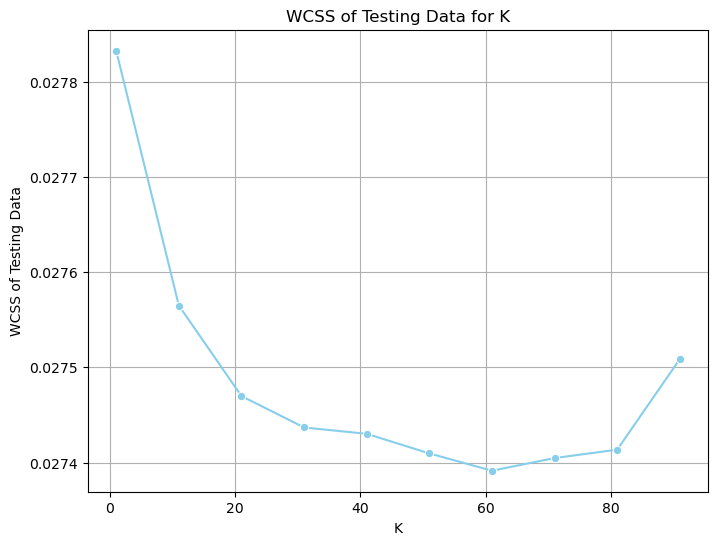

In [82]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, 100, 10), y=history_test, marker='o', color='skyblue')
plt.xlabel('K')
plt.ylabel('WCSS of Testing Data')
plt.title('WCSS of Testing Data for K')
plt.grid(True)
plt.show()

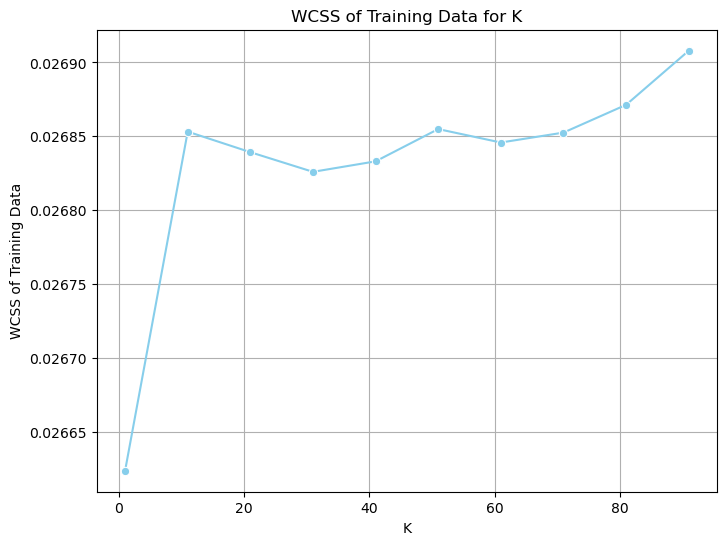

In [83]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, 100, 10), y=history_train, marker='o', color='skyblue')
plt.xlabel('K')
plt.ylabel('WCSS of Training Data')
plt.title('WCSS of Training Data for K')
plt.grid(True)
plt.show()

We find that, through tuning the hyperparameter of K, we find some interesting results.  We find that with larger K, the WCSS of our training data acually tends to increase, while the accuracy of our testing data seems do dip, then rise again slightly.  This is somewhat to be expected, where as we increase K and thus increase the tolerance, it makes sense that the variablility of results will have a tendency to increase.  What's more interesting, however, is the sudden increase in WCSS from between approximately K1 to k=10, which showed a significant change for both training and testing WCSS, suggesting that there is some kind of large threshold for change around those number of neighbors.  This suggests that, for our model, our ideal K would likely lie somewhere from K=10 to K=20. This idea is further suggested by the graph for the results of the test data, which show a decrease in variablility around the same K values which tend to even out towards K=10 to K=20.

# Citations

Used sklearn documentation for k means clustering and silhouette_score evaluation, and KNN model.

In Model 2, we the custom prediction function was deeply inspired by this response:
https://stackoverflow.com/questions/27822752/scikit-learn-predicting-new-points-with-dbscan